In [27]:
import torch
import numpy as np 
import pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [28]:
df = pd.read_csv('titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
modes = df.mode().iloc[0]
modes


PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [32]:
df.fillna(modes, inplace=True)

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

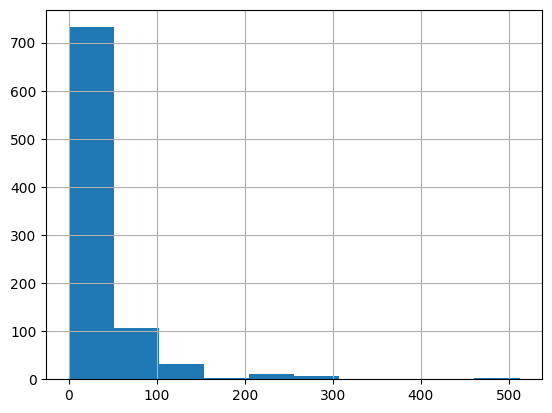

In [37]:
df['Fare'].hist()

In [38]:
df['LogFare'] = np.log(df['Fare']+1)

In [39]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [40]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


In [45]:
from torch import tensor

t_dep = tensor(df.Survived)

In [46]:
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 

In [54]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

indep_cols

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_male',
 'Sex_female',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [58]:
array = df[indep_cols].to_numpy(dtype='float32')

In [63]:
df.loc[:, df.dtypes == 'bool'] = df.loc[:, df.dtypes == 'bool'].astype(int)
print(df)

     PassengerId  Survived                                               Name   Age  SibSp  Parch            Ticket     Fare    Cabin  \
0              1         0                            Braund, Mr. Owen Harris  22.0      1      0         A/5 21171   7.2500  B96 B98   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0          PC 17599  71.2833      C85   
2              3         1                             Heikkinen, Miss. Laina  26.0      0      0  STON/O2. 3101282   7.9250  B96 B98   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0            113803  53.1000     C123   
4              5         0                           Allen, Mr. William Henry  35.0      0      0            373450   8.0500  B96 B98   
..           ...       ...                                                ...   ...    ...    ...               ...      ...      ...   
886          887         0               

/var/folders/jw/4sj899xd5xqbrqwl1q4ry1r40000gn/T/ipykernel_14884/3799510469.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 

In [64]:
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [65]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
n_coeff

12

In [66]:
coeffs = torch.rand(n_coeff)-0.5
coeffs


tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [67]:
t_indep * coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [68]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [69]:
t_indep * coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [70]:
t_indep = t_indep / vals

In [71]:
preds = (t_indep*coeffs).sum(axis=1)

In [78]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5415)

In [79]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [80]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [81]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5415, grad_fn=<MeanBackward0>)

In [82]:
loss.backward()

In [85]:
coeffs.grad

tensor([ 0.0003,  0.0018, -0.0005, -0.0034,  0.2548, -0.1908, -0.1212, -0.0067,  0.1919, -0.1886,  0.0191,  0.2334])

In [86]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([ 0.0007,  0.0036, -0.0010, -0.0069,  0.5095, -0.3816, -0.2424, -0.0135,  0.3838, -0.3771,  0.0382,  0.4669])

In [87]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4685)


In [90]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [91]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)


(713, 178)

In [92]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [93]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [123]:
def init_coeffs(): return torch.randn((3,), requires_grad=True)

In [95]:
def train_model(epochs=10, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [96]:
coeffs = train_model(18, lr=0.2)

0.539; 0.492; 0.444; 0.419; 0.426; 0.379; 0.386; 0.367; 0.340; 0.358; 0.311; 0.354; 0.329; 0.301; 0.323; 0.283; 0.304; 0.285; 

In [97]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.4620),
 'SibSp': tensor(0.1377),
 'Parch': tensor(0.2451),
 'LogFare': tensor(-0.1862),
 'Sex_male': tensor(-0.4198),
 'Sex_female': tensor(0.2177),
 'Pclass_1': tensor(0.6980),
 'Pclass_2': tensor(0.3781),
 'Pclass_3': tensor(0.3809),
 'Embarked_C': tensor(0.0702),
 'Embarked_Q': tensor(0.2114),
 'Embarked_S': tensor(0.2279)}

In [98]:
preds = calc_preds(coeffs, val_indep)

In [99]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [100]:
results.float().mean()

tensor(0.7865)

In [101]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

In [103]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))


In [104]:
coeffs = train_model(lr=100)

0.524; 0.291; 0.211; 0.203; 0.199; 0.198; 0.198; 0.197; 0.197; 0.196; 

In [105]:
acc(coeffs)

tensor(0.8258)

In [106]:
show_coeffs()

{'Age': tensor(-0.4788),
 'SibSp': tensor(0.0442),
 'Parch': tensor(0.1971),
 'LogFare': tensor(-0.1976),
 'Sex_male': tensor(-10.0860),
 'Sex_female': tensor(7.3161),
 'Pclass_1': tensor(3.2763),
 'Pclass_2': tensor(1.3399),
 'Pclass_3': tensor(-5.7271),
 'Embarked_C': tensor(0.7497),
 'Embarked_Q': tensor(1.2540),
 'Embarked_S': tensor(-4.0620)}

In [107]:
tst_df = pd.read_csv('titanic/test.csv')

In [108]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,B96 B98,2.178064,False,True,False,False,True,False,True,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B96 B98,2.079442,True,False,False,False,True,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,B96 B98,2.369075,False,True,False,True,False,False,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,B96 B98,2.268252,False,True,False,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,B96 B98,2.586824,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500,B96 B98,2.202765,False,True,False,False,True,False,False,True
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,4.699571,True,False,True,False,False,True,False,False
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,B96 B98,2.110213,False,True,False,False,True,False,False,True
416,1308,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500,B96 B98,2.202765,False,True,False,False,True,False,False,True


In [114]:
tst_df.loc[:, tst_df.dtypes == 'bool'] = tst_df.loc[:, tst_df.dtypes == 'bool'].astype(int)
print(tst_df)

     PassengerId                                          Name   Age  SibSp  Parch              Ticket      Fare    Cabin   LogFare  \
0            892                              Kelly, Mr. James  34.5      0      0              330911    7.8292  B96 B98  2.178064   
1            893              Wilkes, Mrs. James (Ellen Needs)  47.0      1      0              363272    7.0000  B96 B98  2.079442   
2            894                     Myles, Mr. Thomas Francis  62.0      0      0              240276    9.6875  B96 B98  2.369075   
3            895                              Wirz, Mr. Albert  27.0      0      0              315154    8.6625  B96 B98  2.268252   
4            896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1             3101298   12.2875  B96 B98  2.586824   
..           ...                                           ...   ...    ...    ...                 ...       ...      ...       ...   
413         1305                            Spector, Mr

/var/folders/jw/4sj899xd5xqbrqwl1q4ry1r40000gn/T/ipykernel_14884/2445228052.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 

In [116]:
tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [117]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [118]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [119]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [124]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [125]:
coeffs = train_model(lr=1.4)

RuntimeError: both arguments to matmul need to be at least 1D, but they are 2D and 0D